In [10]:
from pytorch_fast_elmo import FastElmo, batch_to_char_ids
import sys
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy
import matplotlib.pyplot as plt
import random

In [11]:
def plot_hierarchically(vecs, labels):

    Z = linkage(vecs, optimal_ordering  = False, method = "ward")
    order = scipy.cluster.hierarchy.leaves_list(Z)
    labels_with_indices = zip(labels, order)
    labels_with_indices = sorted(labels_with_indices, key = lambda tup: tup[1])
    labels_sorted, _ = list(zip(*labels_with_indices))
    plt.figure()
    dendrogram(Z, labels = labels_sorted, leaf_font_size = 10, orientation = "left", color_threshold = 0)  
    plt.show()
    
def load_sents(fname = "sents_f", max_length = None):
    
    with open(fname, "r") as f:
              
        lines = f.readlines()
    
    lines =  [line.strip().split(" ") for line in lines]
    if max_length is not None:
        lines = list(filter(lambda sentence: len(sentence) < max_length, lines))
    return lines

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

Load pretrained ELMO and a collection of Wikipedia sentences.

In [12]:
all_sentences = load_sents(max_length = 15)
options_file = 'elmo_2x4096_512_2048cnn_2xhighway_options.json'
weight_file = 'elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5'
elmo = FastElmo(options_file, weight_file)

collect ELMO states over a collection of sentences.

In [15]:
num_sentences = 60
sentences = all_sentences[:num_sentences] # load random sentences from wikipedia
character_ids = batch_to_char_ids(sentences)
embeddings = elmo(character_ids) # collect elmo states

perform hierarchical clustering on a sample of sentences.

founder of petty enterprises , level cross , north carolina , near greensboro .


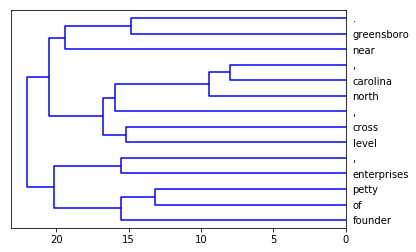

this resolved catalan 's conjecture for all but a finite number of cases .


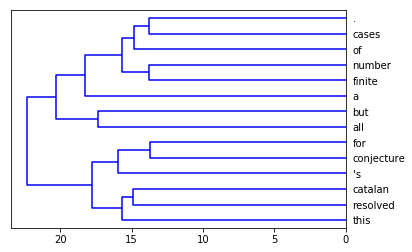

trains will reach top speeds of 250 kilometres per hour on this line .


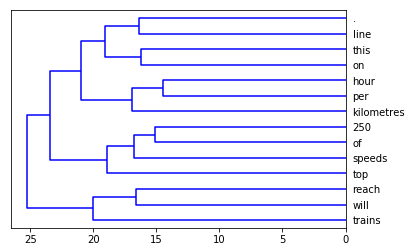

writing on yourself in pen ink is not harmful by almost any means .


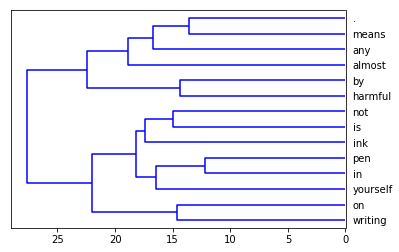

the village was enhanced in june 2005 by the addition of a pharmacy .


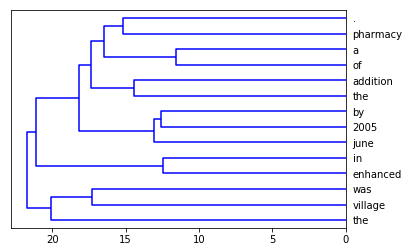

worthy of note , of course , is that we have different counsel .


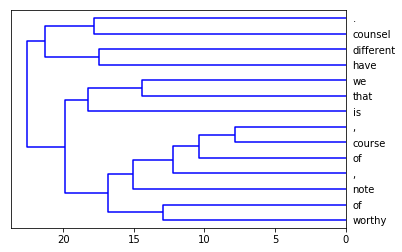

he attacked the bowling immediately , [ 8 ] sharing a large partnership .


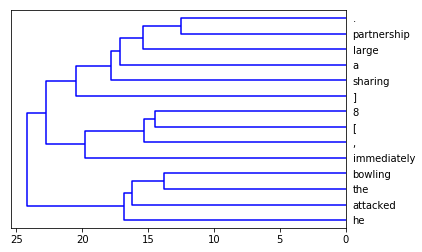

serbia claims all of kosovo , turkey does not claim all of cyprus .


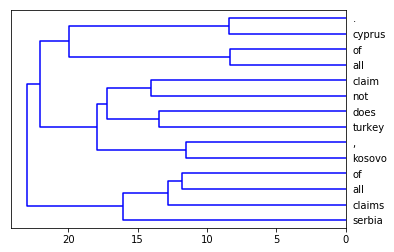

he plays the title character in the 2013 feature film the lone ranger .


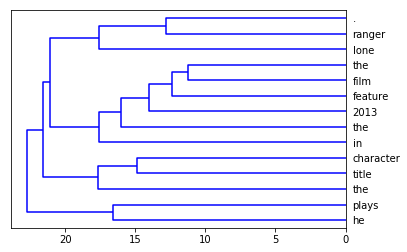

she was recognized for her outstanding research in 2004 with the thomas c .


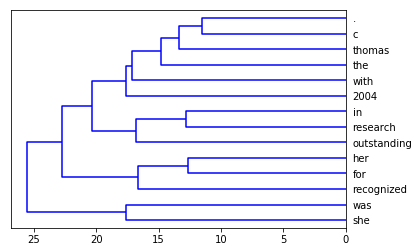

this fire was put out by the end of the day , however .


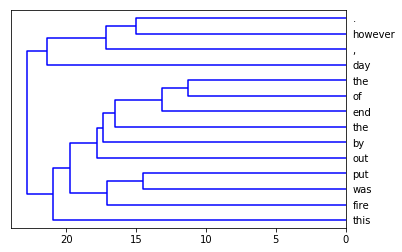

again , this is a matter of personal preference and not a must .


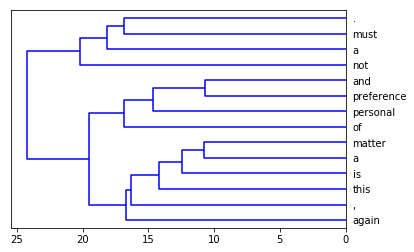

he served in the vermont senate from 1851 to 1852 was senate president .


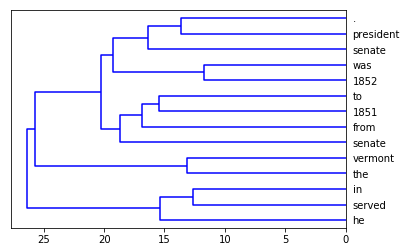

he died in the attempt , though , and was buried at sea .


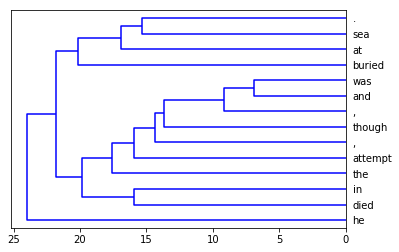

the latter applies to all 27 current member states of the european union .


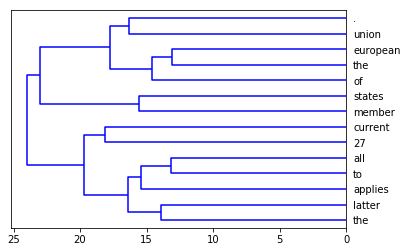

in 2007 , villa was actively training to make the 2010 winter paralympics .


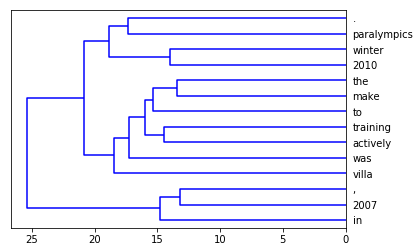

the play was adapted for tv by the australian broadcasting corporation in 1973 .


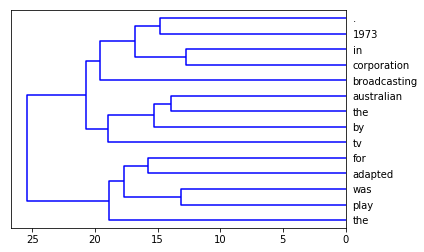

the basement was ready and used for midnight mass on christmas , 1923 .


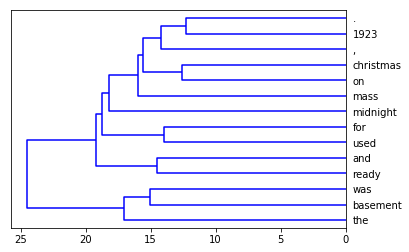

the first censorship action was carried out by uae authorities in november 2009 .


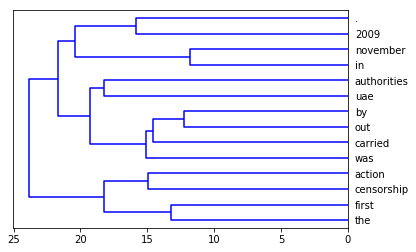

there are 2 main housing estates in northumberland park and a metro station .


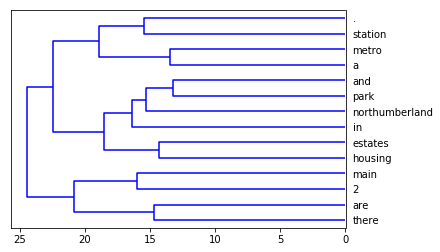

the format of the table was done before i saw that other page .


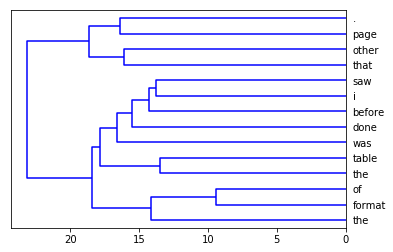

in 1988 , he published his first book dedicated entirely to film theory .


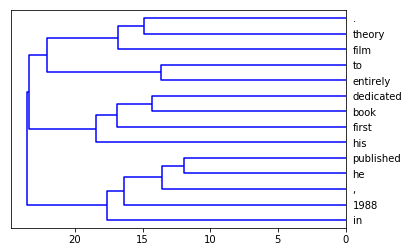

the murray river is the only large , permanent river in the state .


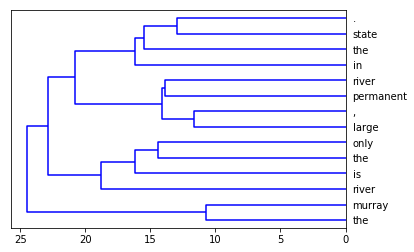

ranger battalion out in an open field , the germans began their ambush .


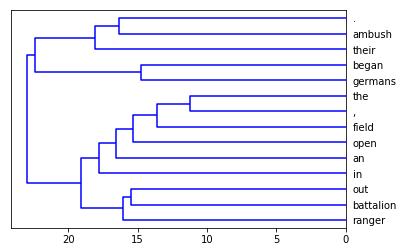

the gardens are occasionally open to the public , mainly in the spring .


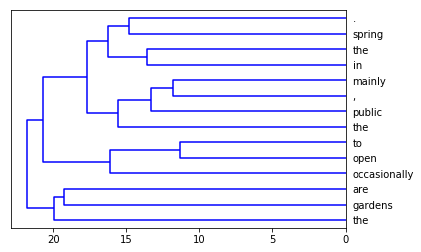

just so you 'll know at least two people have touched it now .


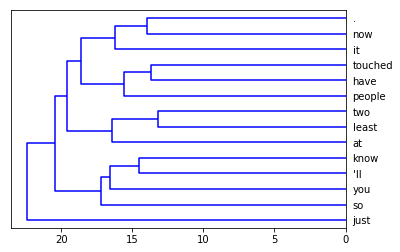

the challenge is a free campaign supported by national civic and health organizations .


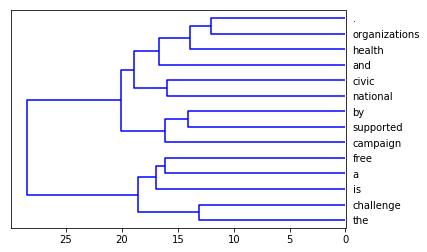

my main reason for asking the question and inviting debate was to learn .


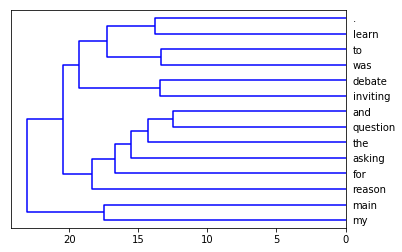

measurements made include a wide range of physical , chemical and biological variables .


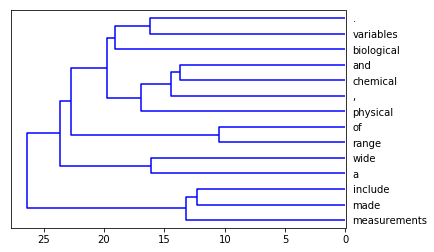

putting every household at risk , to be released in september , 2004 .


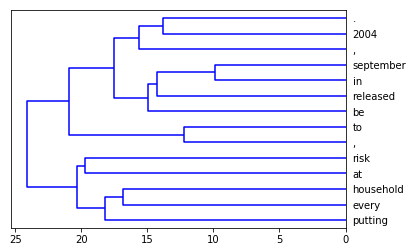

seven are chosen annually , two from the previous year continued in office .


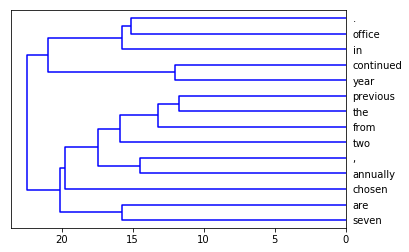

the gameplay has four different command modes to which the ai reacts differently .


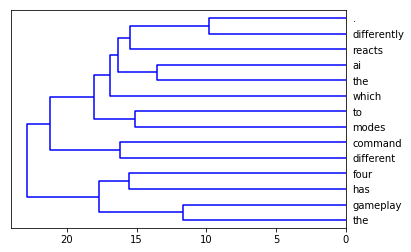

one of its core principles is the separation of behavior from dependency resolution .


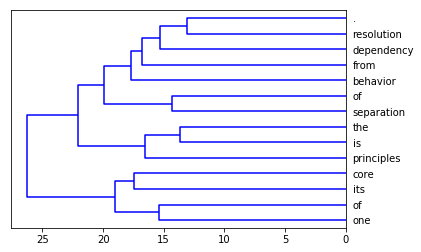

programs had to be written in a specific way to access expanded memory .


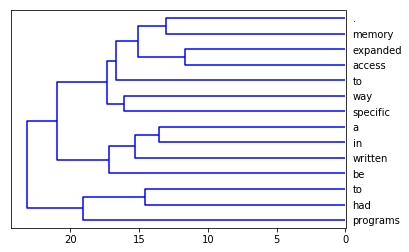

remnants of fire found during the excavation show that the city was burnt .


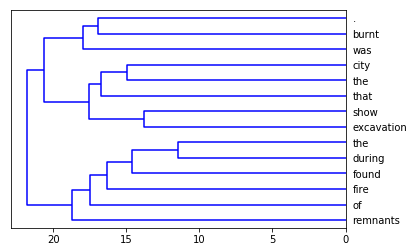

that very well may happen , but that is for later to decide .


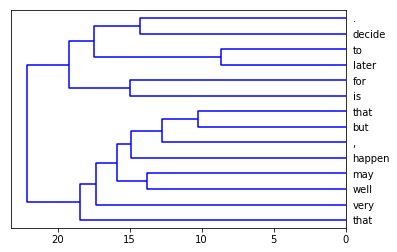

it was evident , however , that the system needed to be enlarged .


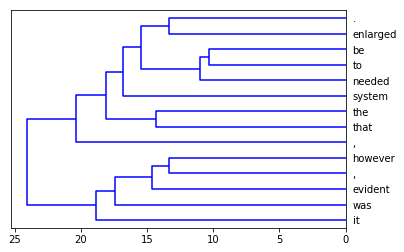

that quote could be used as an example for what wp is not .


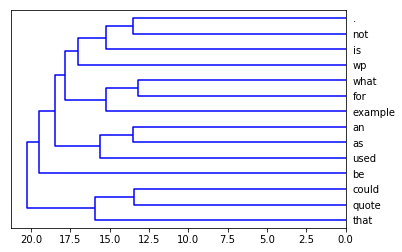

in 1943 , she obtained a medical degree from the university of chicago .


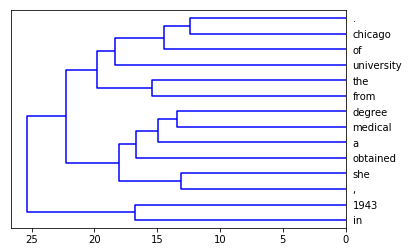

support an interesting character , he seems to bring much life into wikipedia .


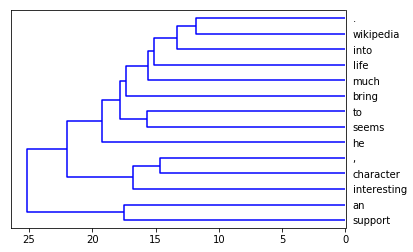

see rules of the supreme court of the united states ( 2005 ed .


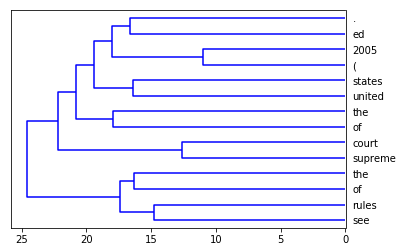

removal of questions on rfa is out with the scope of administrator duties .


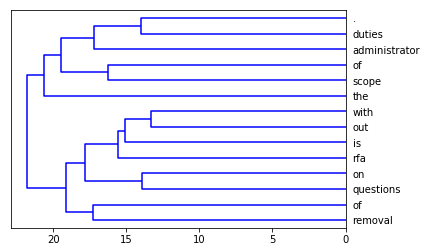

instead , individual shots or short sequences were processed for special visual effects .


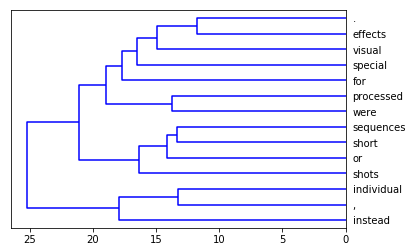

it contains links to his who 's who in america entry and c .


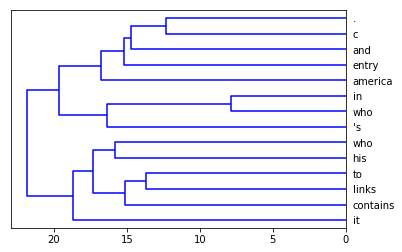

i will be only too pleased to address the root problem with editors .


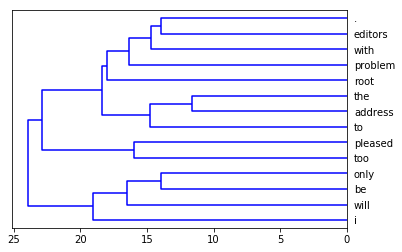

looks like it was split from censorship with just brazil and venezuela ( !


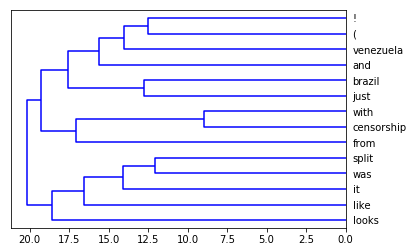

the music video featured clips from the movie as well as performance clips .


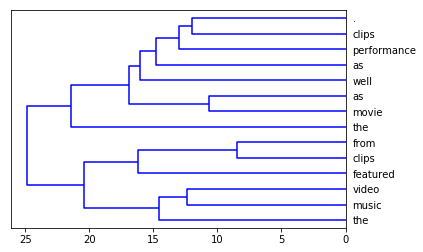

groundbreaking was april 20 , 2008 with construction to occur in three phases .


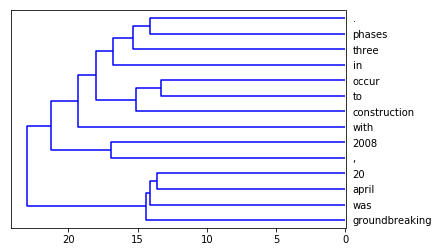

for its entire length , it runs roughly parallel to the kern river .


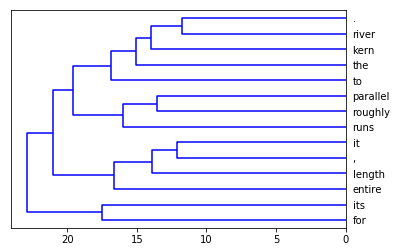

perhaps your reason for being in this discussion is simply a personal attack .


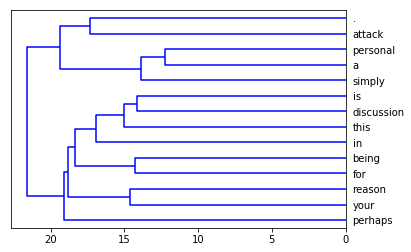

the prevailing peace and order remains the best argument for promoting the province .


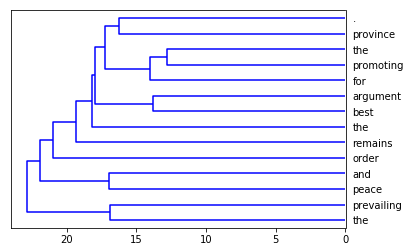

bn does not give you anything other than numbers and the close date .


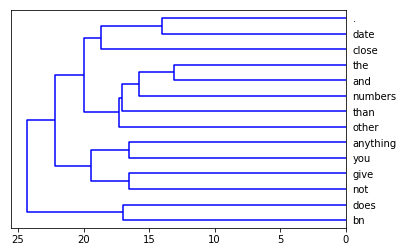

that portal has received over 30 , 000 page views in april 2013 .


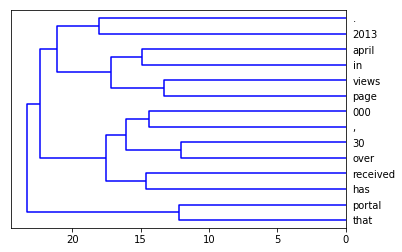

the park is filled with small caves , especially on the mountain proper .


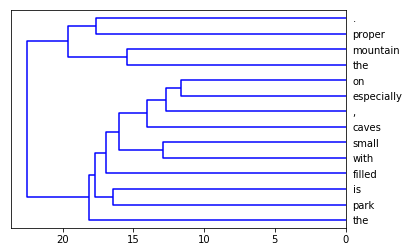

i do not think this treatment of davis reflects well on this project .


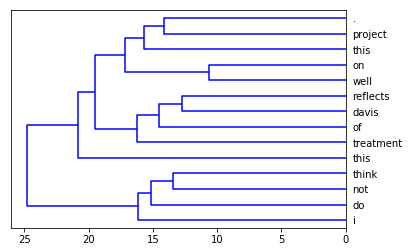

separation proved unfortunate to his marriage , which ended in divorce in 1962 .


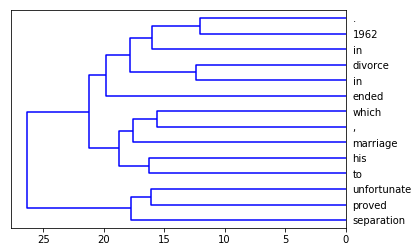

the pillars are simple , with the brackets coming from the boxed capitals .


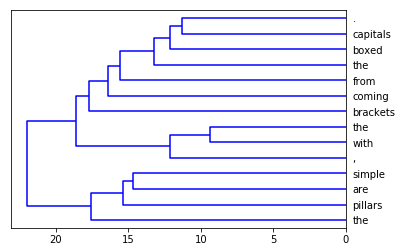

in 1941 , the museum building and artifacts were badly damaged by bombing .


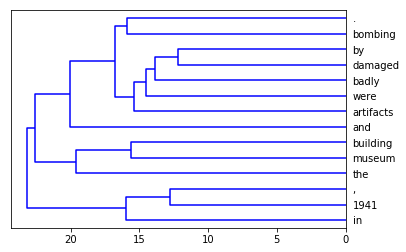

now is a good time to make sure that everything is still verified .


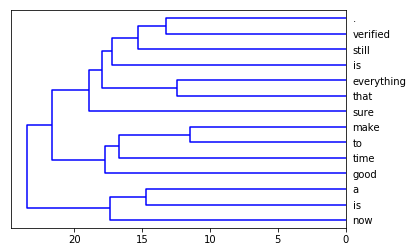

in 1930 , jackson was elected to membership in the american law institute .


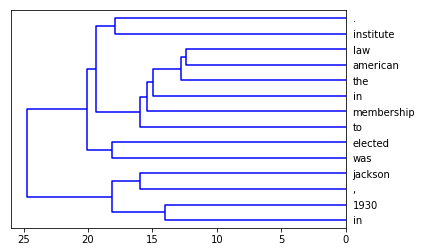

In [16]:

for i in range(num_sentences):
    
    sent_embs = embeddings["elmo_representations"][0][i].detach().numpy()
    sent = sentences[i]
    print(" ".join(sent))
    plot_hierarchically(sent_embs, sent)
    
# sent_embs = embeddings["elmo_representations"][0][-1].detach().numpy()
# print(sent_embs.shape)
# print(" ".join(sent))
# plot_hierarchically(sent_embs, sent)
# plot_hierarchically(sent_embs, sent)